# 과제1. car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 0.환경설정

* 필요한 라이브러리 로딩, 데이터셋 가져오기

### 1) 라이브러리 로딩

In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst                              # 가설검정 도구 가져오기

matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 2) 데이터 불러오기

In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['CompPrice','Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes
3,7.40,4,466,97,Medium,55,Yes
4,4.15,3,340,128,Bad,38,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(Good, Medium, Bad)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes, No)	|	feature	|


## 1.가설수립

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) Sales

In [3]:
target = 'Sales'

* 타겟 변수

1) 변수의 비즈니스 의미

* 지역 매장별 매출액(1000달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무

In [4]:
data[target].isna().sum()

0

4) 기초통계량(수치화)

In [5]:
data[target].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

5) 분포 확인(시각화)

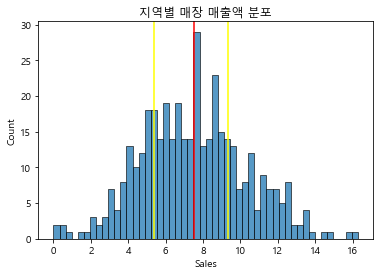

In [130]:
sns.histplot(data[target], bins=50)
plt.title('지역별 매장 매출액 분포')
plt.axvline(data[target].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

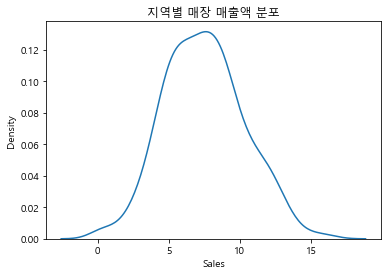

5.390000000000001


In [128]:
sns.kdeplot(data[target])
plt.title('지역별 매장 매출액 분포')
plt.show()
print(box['whiskers'][0].get_ydata()[0])

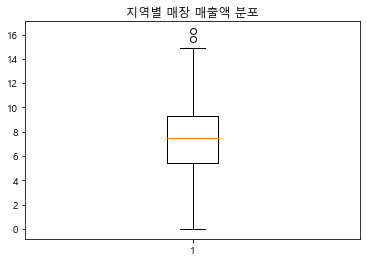

[5.39 0.  ]
[ 9.32 14.9 ]


In [127]:
box = plt.boxplot(data[target])
plt.title('지역별 매장 매출액 분포')
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 카시트가 하나도 판매되지 않은 매장이 존재한다.
> * 14900달러 이상 판매한 매장은 이상치로 검토할 필요가 있다.
> * 75% 매장이 5390달러이상 판매하였다.

7) 추가 분석해 볼 사항이 있나요?

> * 카시트를 판매하지 못한 매장을 추가 분석하여 원인을 파악해보아야한다.

### 2) Advertising

In [151]:
var = 'Advertising'

1) 변수의 비즈니스 의미

 * 지역매장별 광고 비용(1000달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무

In [15]:
data[var].isna().sum()

0

4) 기초통계량(수치화)

In [16]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

5) 분포 확인(시각화)

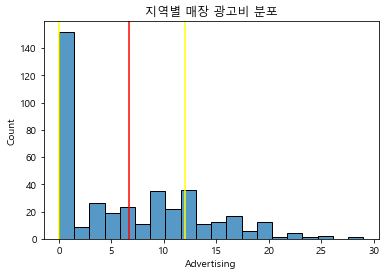

In [154]:
sns.histplot(data[var], bins=20)
plt.title('지역별 매장 광고비 분포')
plt.axvline(data[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

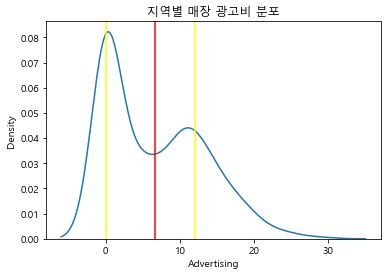

In [153]:
sns.kdeplot(data[var])
plt.title('지역별 매장 광고비 분포')
plt.axvline(data[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

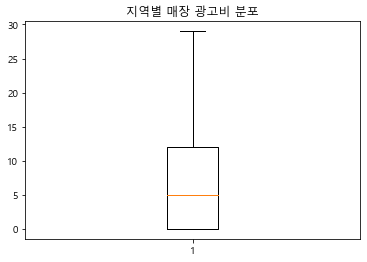

[0. 0.]
[12. 29.]


In [152]:
box = plt.boxplot(data[var])
plt.title('지역별 매장 광고비 분포')
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 75%의 매장이 12000달러이하로 광고 비용을 사용하였다.
> * 광고비용을 전혀 사용하지 않은 지역매장이 25%가량 존재한다.
> * 광고비용을 전혀 사용하지 않은 매장에 어떠한 요인이 있는지 살펴볼 필요가 있다.

7) 추가 분석해 볼 사항이 있나요?

> * 광고비용을 전혀 사용하지 않은 매장과 따로 카시트 판매액을 비교분석할 필요가 있다.

### 3) Population

In [142]:
var = 'Population'

1) 변수의 비즈니스 의미

* 지역별 인구수(1000명)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무

In [21]:
data[var].isna().sum()

0

4) 기초통계량(수치화)

In [22]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

5) 분포 확인(시각화)

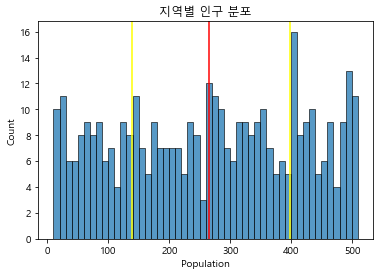

In [144]:
sns.histplot(data[var], bins=50)
plt.title('지역별 인구 분포')
plt.axvline(data[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

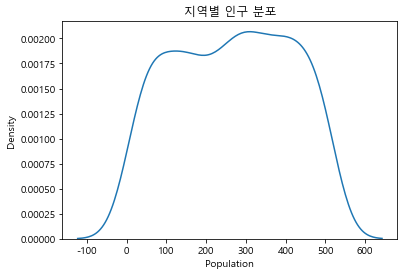

In [26]:
sns.kdeplot(data[var])
plt.title('지역별 인구 분포')
plt.show()

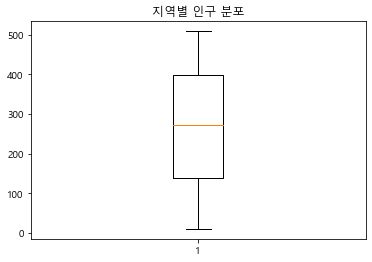

[139.  10.]
[398.5 509. ]


In [143]:
box = plt.boxplot(data[var])
plt.title('지역별 인구 분포')
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 그래프 분포 상태를 볼때 인구수는 유의미한 차이가 보이지 않는다.

7) 추가 분석해 볼 사항이 있나요?

> * 인구수와 타 변수의 관계를 비교분석해볼 필요가 있다.

### 4) Price

In [145]:
var= 'Price'

1) 변수의 비즈니스 의미

* 지사 지역별 판매가격(달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무

In [30]:
data[var].isna().sum()

0

4) 기초통계량(수치화)

In [31]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

5) 분포 확인(시각화)

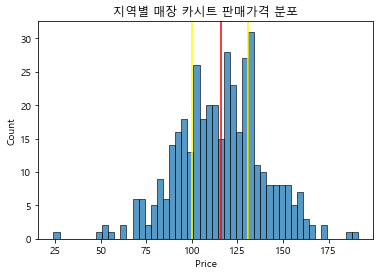

In [147]:
sns.histplot(data[var], bins=50)
plt.title('지역별 매장 카시트 판매가격 분포')
plt.axvline(data[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

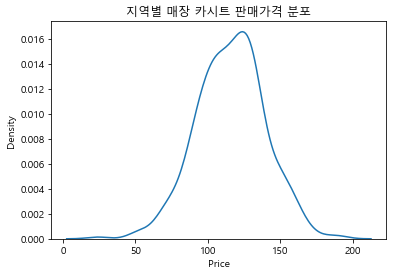

In [33]:
sns.kdeplot(data[var])
plt.title('지역별 매장 카시트 판매가격 분포')
plt.show()

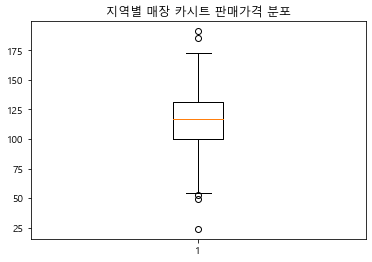

[100.  54.]
[131. 173.]


In [146]:
box = plt.boxplot(data[var])
plt.title('지역별 매장 카시트 판매가격 분포')
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 판매가격이 54달러 이하 173달러 이상인 매장은 이상치로 검토할 필요가 있다.
> * 카시트 가격이 100에서 131달러 사이가 50%를 차지하고 있다.

7) 추가 분석해 볼 사항이 있나요?

> * 가격이 너무 낮은지역이나 너무 높은 지역이 어떠한 요인때문에 형성되었는지 조사할 필요가 있다.

### 5) ShelveLoc

In [35]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 진열상태(좋음, 중간, 나쁨)

2) 숫자, 범주?

* 범주

3) NaN 존재 유무

In [36]:
data[var].isna().sum()

0

4) 기초통계량(수치화)

In [41]:
data[var].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [42]:
cnt = data[var].value_counts()

5) 분포 확인(시각화)

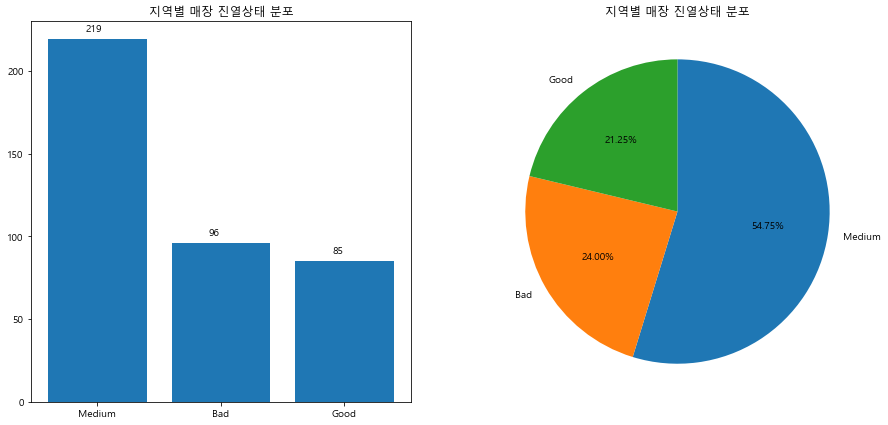

In [48]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.bar(cnt.index, cnt.values)
plt.title('지역별 매장 진열상태 분포')
for i in range(3):
    plt.text(i-.1, cnt.values[i]+5, cnt.values[i])

plt.subplot(1,2,2)
plt.title('지역별 매장 진열상태 분포')
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 진열상태가 좋은 지역과 중간인 지역이 전체 매장에 75%를 차지한다.
> * 진열상태가 안좋은 매장과 좋은 매장의 판매액 차이를 비교분석할 필요가 있다.
> * 진열상태 나쁨이 좋음보다 많은것으로 보아 본사 차원에서 매장관리가 필요하다.

7) 추가 분석해 볼 사항이 있나요?

> * 관리상태가 안좋은지역의 원인을 알아볼 필요가 있다.

### 6) [추가]Age

In [148]:
var = 'Age'

1) 변수의 비즈니스 의미

* 지역별 인구의 평균연령

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무

In [83]:
data[var].isna().sum()

0

4) 기초통계량(수치화)

In [84]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

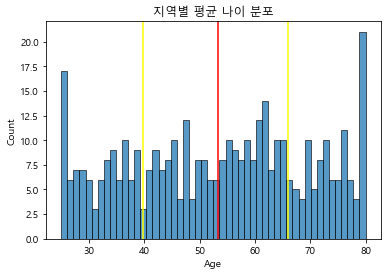

In [150]:
sns.histplot(data[var], bins=50)
plt.title('지역별 평균 나이 분포')
plt.axvline(data[var].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='yellow')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='yellow')
plt.show()

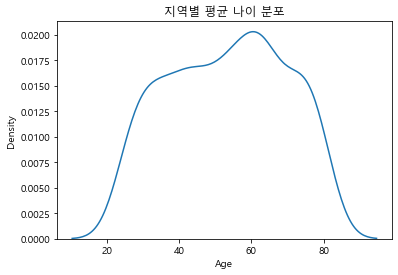

In [86]:
sns.kdeplot(data[var])
plt.title('지역별 평균 나이 분포')
plt.show()

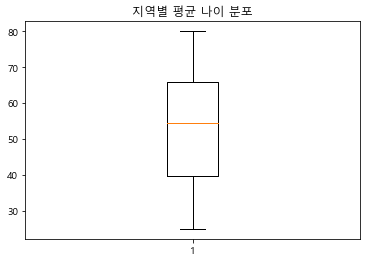

[39.75 25.  ]
[66. 80.]


In [149]:
box = plt.boxplot(data[var])
plt.title('지역별 평균 나이 분포')
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 어린 아이가 많은 지역과, 노인이 많은 지역이 두드러지게 있고 이에 따른 매출액에 차이가 있는지 확인해 볼 필요가 있다.

7) 추가 분석해 볼 사항이 있나요?

> * 

### 7) [추가]US

In [88]:
var = 'US'

1) 변수의 비즈니스 의미

* 매장이 미국에 있는지 여부

2) 숫자, 범주?

* 범주

3) NaN 존재 유무

In [89]:
data[var].isna().sum()

0

4) 기초통계량(수치화)

In [90]:
data[var].value_counts()

Yes    258
No     142
Name: US, dtype: int64

5) 분포 확인(시각화)

In [91]:
cnt = data[var].value_counts()

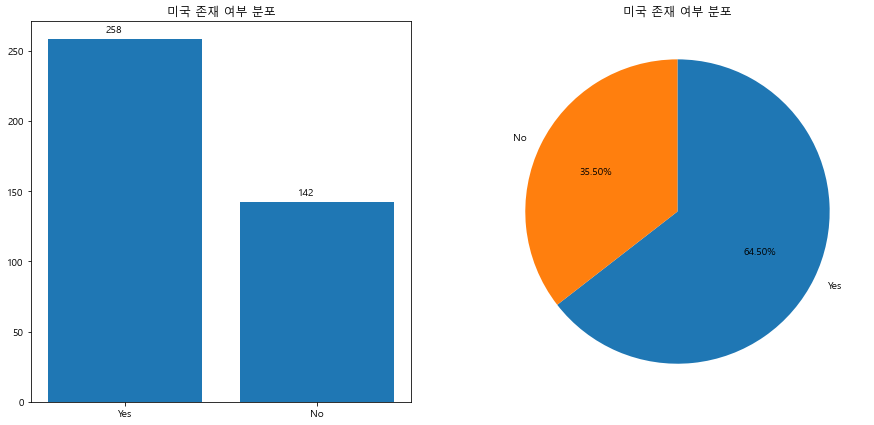

In [93]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.bar(cnt.index, cnt.values)
plt.title('미국 존재 여부 분포')
for i in range(2):
    plt.text(i-.1, cnt.values[i]+5, cnt.values[i])

plt.subplot(1,2,2)
plt.title('미국 존재 여부 분포')
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 64.5퍼센트 가량의 매장이 미국지역에 존재한다.

7) 추가 분석해 볼 사항이 있나요?

> * 미국에 있는 매장과, 없는 매장과의 차이점을 비교 분석해본다.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [49]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### 1) Advertising -> Sales

In [124]:
var = 'Advertising'

① 시각화 : scatter(regplot), jointplot

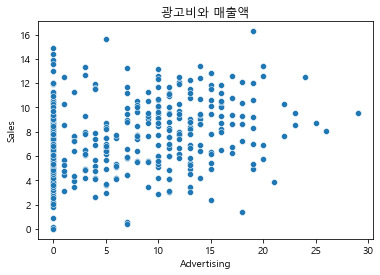

In [58]:
sns.scatterplot(x=var, y=target, data=data)
plt.title('광고비와 매출액')
plt.show()

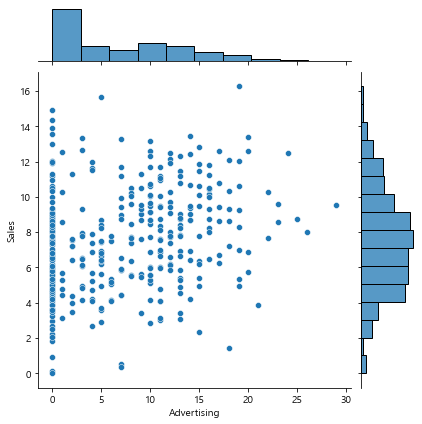

In [125]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

② 수치화 : 상관분석

In [126]:
temp = spst.pearsonr(data[var], data[target])
print('상관계수 : ', temp[0])
print('p-value : ', temp[1])

상관계수 :  0.2695067813769019
p-value :  4.377677110302732e-08


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> * 광고비가 0인 매장과 매출액과의 관계분포가 고르게 분포되어있어 분석이 필요하다.
> * 양의상관관계를 가지고 있으나 광고비 0인 지역을 고려한 추가분석이 필요하다.
> * 중 하 정도의 상관관계

#### 2) Population -> Sales

In [120]:
var = 'Population'

① 시각화 : scatter(regplot), jointplot

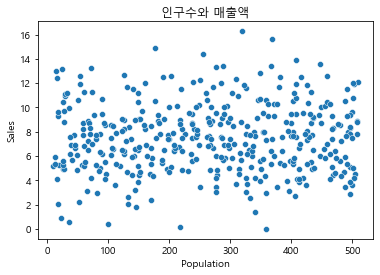

In [66]:
sns.scatterplot(x=var, y=target, data=data)
plt.title('인구수와 매출액')
plt.show()

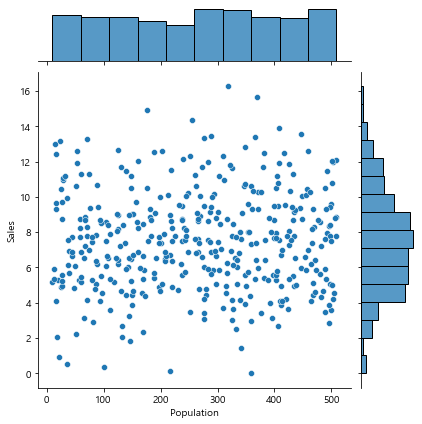

In [121]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

② 수치화 : 상관분석

In [123]:
temp = spst.pearsonr(data[var], data[target])
print('상관계수 : ', temp[0])
print('p-value : ', temp[1])

상관계수 :  0.05047098447203919
p-value :  0.31398160931903


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> * 상관관계는 존재하지 않는다.(유의수준 0.05)
> * 대부분 고르게 분포되어 있다.

#### 3) Price -> Sales

In [69]:
var = 'Price'

① 시각화 : scatter(regplot), jointplot

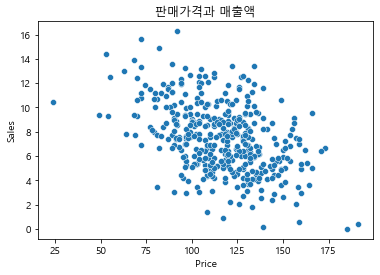

In [70]:
sns.scatterplot(x=var, y=target, data=data)
plt.title('판매가격과 매출액')
plt.show()

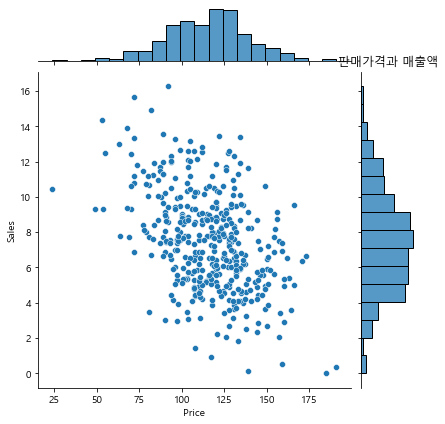

In [71]:
sns.jointplot(x=var, y=target, data=data)
plt.title('판매가격과 매출액')
plt.show()

② 수치화 : 상관분석

In [72]:
spst.pearsonr(data[var], data[target])

(-0.44495072784657264, 7.618187011912723e-21)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> * 분포와 수치 모두 음의상관관계를 잘 나타내고 있다.
> * 판매가격이 높아질 수록 매출액은 적어진다.
> * 중 상의 상관관계

#### 4) [추가] Age -> Sales

In [95]:
var = 'Age'

① 시각화 : scatter(regplot), jointplot

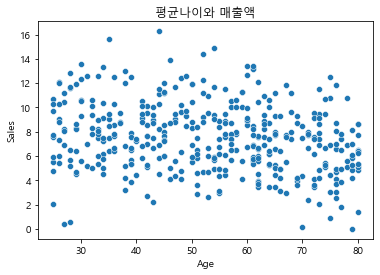

In [96]:
sns.scatterplot(x=var, y=target, data=data)
plt.title('평균나이와 매출액')
plt.show()

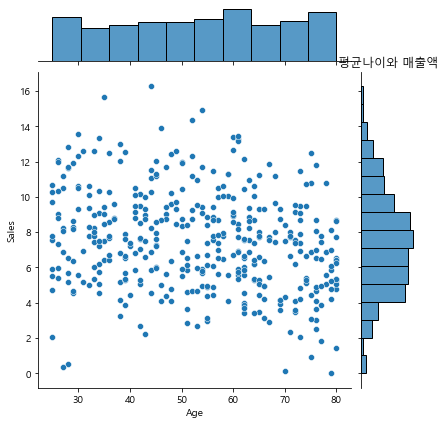

In [97]:
sns.jointplot(x=var, y=target, data=data)
plt.title('평균나이와 매출액')
plt.show()

② 수치화 : 상관분석

In [101]:
spst.pearsonr(data[var], data[target])

(-0.2318154396045765, 2.7889498393711916e-06)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 분포상 약한 상관관계를 띄고 있는 것으로 보인다.

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### 1) ShelveLoc-> Sales

In [73]:
var = 'ShelveLoc'

① 시각화 : 평균비교 barplot

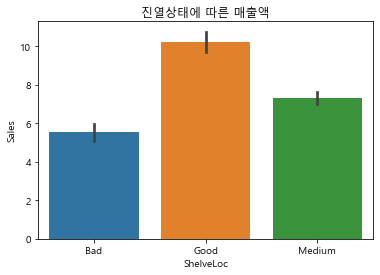

In [78]:
sns.barplot(x=var, y=target, data=data)
plt.title('진열상태에 따른 매출액')
plt.show()

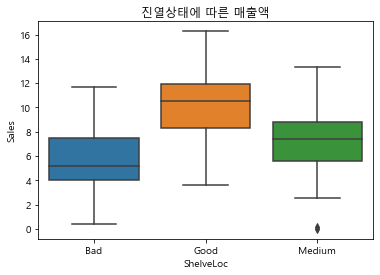

In [79]:
sns.boxplot(x=var, y=target, data=data)
plt.title('진열상태에 따른 매출액')
plt.show()

② 수치화 : t-test, anova

In [80]:
G = data.loc[data[var]=='Good',target]
M = data.loc[data[var]=='Medium',target]
B = data.loc[data[var]=='Bad',target]

In [81]:
spst.f_oneway(G,M,B)

F_onewayResult(statistic=92.22990509910349, pvalue=1.26693609015938e-33)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> * 그래프를 비교하였을때 신뢰구간이 겹치는 부분이 없어 진열상태의 따른 매출액 평균에는 유의미한 차이가 있다.(강한관계)

> * anova테스트 결과 진열상태에 따른 매출액에 차이가 있다고 할 수 있다.

#### 2) [추가]US-> Sales

In [102]:
var = 'US'

① 시각화 : 평균비교 barplot

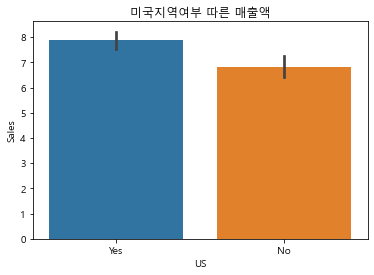

In [104]:
sns.barplot(x=var, y=target, data=data)
plt.title('미국지역여부 따른 매출액')
plt.show()

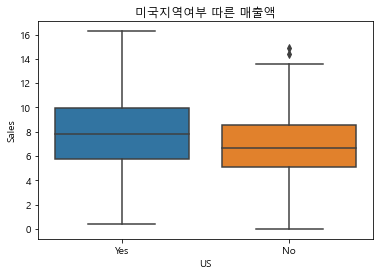

In [105]:
sns.boxplot(x=var, y=target, data=data)
plt.title('미국지역여부 따른 매출액')
plt.show()

② 수치화 : t-test, anova

In [107]:
Y = data.loc[data[var]=='Yes',target]
N = data.loc[data[var]=='No',target]

In [108]:
spst.ttest_ind(Y, N)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> * 분포상 미국에 존재할때 매출액에 약간 더 높은것으로 나타난다.
> * t-test 결과 미국존재여부에 따른 매출액에 차이가 있다.

## 4.관계 정리

### 1) 강한관계의 변수

* 진열상태, 판매가격

### 2) 약한관계의 변수

* 광고비, 나이, 미국 존재 여부

### 3) 관계 없음

* 인구수

### 4) 추가 분석

> * 2000달러 밑으로 판매한 지역 매장(카시트를 판매하지 못한 매장 포함)을 추가 분석해볼 필요가 있다.
> * 광고비용을 전혀 사용하지 않은 매장과 따로 카시트 판매액을 비교분석할 필요가 있다.
> * 중위수를 기준으로 인구수가 많은지역 적은지역을 타 변수와 비교분석해볼 필요가 있다.
> * 관리상태가 안좋은지역의 원인을 알아볼 필요가 있다.
> * 미국에 있는 매장, 없는 매장과의 차이점을 비교 분석해본다.
> * 양의상관관계를 가지고 있으나 광고비 0인 지역을 고려한 추가분석이 필요하다.

In [112]:
data.corr()

,Sales,Advertising,Population,Price,Age
Sales,1.000000,0.269507,0.050471,-0.444951,-0.231815
Advertising,0.269507,1.000000,0.265652,0.044537,-0.004557
Population,0.050471,0.265652,1.000000,-0.012144,-0.042663
Price,-0.444951,0.044537,-0.012144,1.000000,-0.102177
Age,-0.231815,-0.004557,-0.042663,-0.102177,1.000000
